# Predicting with Neural Networks

In [1]:
from scipy.special import expit
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

from sklearn import svm
import pandas as pd
import numpy as np
import sklearn

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import model_selection
# from skearn.model_selection import train_test_split

from sys import getsizeof

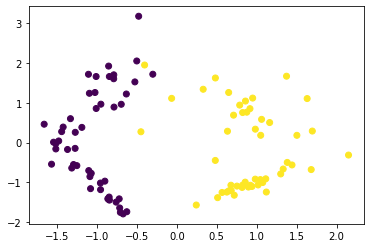

In [2]:
X, y = make_classification(n_samples=100, random_state=1,n_features=2,n_redundant=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y,
                          random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)

In [3]:
clf = MLPClassifier(
  hidden_layer_sizes=(1),
  max_iter=100,
  alpha=1e-4,
  solver="lbfgs",
  verbose=10,
  random_state=1,
  learning_rate_init=0.1,
  activation= 'identity'
)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32788D-01    |proj g|=  2.91544D-01

At iterate    1    f=  3.35088D-01    |proj g|=  2.35449D-01

At iterate    2    f=  1.05920D-01    |proj g|=  4.94459D-02

At iterate    3    f=  9.85237D-02    |proj g|=  4.04533D-02

At iterate    4    f=  8.44635D-02    |proj g|=  3.47573D-02

At iterate    5    f=  5.57031D-02    |proj g|=  1.73370D-02

At iterate    6    f=  5.34230D-02    |proj g|=  1.04731D-02

At iterate    7    f=  5.15416D-02    |proj g|=  6.85965D-03

At iterate    8    f=  5.01827D-02    |proj g|=  1.12827D-02

At iterate    9    f=  4.85440D-02    |proj g|=  7.09723D-03

At iterate   10    f=  4.79637D-02    |proj g|=  3.63648D-03

At iterate   11    f=  4.79104D-02    |proj g|=  9.42768D-04

At iterate   12    f=  4.79058D-02    |proj g|=  5.77602D-04

At iterate   13    f=  4.7

 This problem is unconstrained.


1.0

In [4]:
clf.out_activation_

'logistic'

In [5]:
type([[-1,2]])

list

In [6]:
pt = np.array([[-1,2]])

In [7]:
type(pt)

numpy.ndarray

In [8]:
clf.coefs_

[array([[-4.28708146],
        [ 0.12348133]]),
 array([[-3.06595372]])]

In [9]:
clf.intercepts_

[array([-2.31857838]), array([-1.41144772])]

In [10]:
(np.sum(pt.T*clf.coefs_[0],axis=0) + clf.intercepts_[0])*clf.coefs_[1] + clf.intercepts_[1]

array([[-8.20396314]])

In [11]:
expit((np.sum(pt.T*clf.coefs_[0],axis=0) + clf.intercepts_[0])*clf.coefs_[1] + clf.intercepts_[1])

array([[0.00027349]])

In [12]:
clf.predict_proba([[-1,2]])

array([[9.99726508e-01, 2.73492415e-04]])

In [13]:
clf.predict([[-1,2]])

array([0])

In [14]:
clf = MLPClassifier(
  hidden_layer_sizes=(1),
  max_iter=100,
  alpha=1e-4,
  solver="lbfgs",
  verbose=10,
  random_state=1,
  learning_rate_init=0.1,
  activation= 
)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

SyntaxError: invalid syntax (3241236577.py, line 10)